# $ CO_2 $ Predictions 

- - -

**Goals of this mini-project**:
1. Demonstrate a little EDA process
2. Data Cleaning
3. Find the appropriate features
4. Feature Engineering
5. Data Scaling and Preparation for Model
    - Column Transformer
    - Scaler
    - Encoding
6. Data Pipeline
    - Make Custom Transformer
7. Model Training
8. Evaluation

# 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./Datasets/FuelConsumptionCo2.csv")

In [5]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [10]:
# Making a new - refined column names
renamed = ["year", "make", "model", "class", "eng_size", "cylinders",
           "fuel", "transmsn", "fc_cty", "fc_hwy", "fc_comb", "fc_mpg", "co2"]

FC = Fuel Consumption 

In [11]:
df.columns = renamed
df.head()

,year,make,model,class,eng_size,cylinders,fuel,transmsn,fc_cty,fc_hwy,fc_comb,fc_mpg,co2
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


###### 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
features = ["year", "make", "model", "class", "eng_size", "cylinders",
           "fuel", "transmsn", "fc_cty", "fc_hwy", "fc_comb", "fc_mpg"]
target = ["co2"] 

In [14]:
X = df[features].copy()
y = df[target].copy()

In [15]:
num_features = ["eng_size", "cylinders", "fc_cty", "fc_hwy", "fc_comb", "fc_mpg"]
cat_features = ["make", "model", "class", "fuel", "transmsn"]

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)

# 

# 1. EDA *and* 2. Cleaning 

Moving Ahead, I still don't know whether we should have chosen the Stratified Sampling or not, but will come here later if we needed to do that. For now, we are moving ahead.

In [42]:
X_train.describe()

,year,eng_size,cylinders,fc_cty,fc_hwy,fc_comb,fc_mpg
count,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2014.0,3.336835,5.780112,13.305322,9.481092,11.588796,26.390756
std,0.0,1.408699,1.804808,4.071131,2.775028,3.460908,7.355907
min,2014.0,1.000000,3.000000,4.700000,4.900000,4.800000,11.000000
25%,2014.0,2.000000,4.000000,10.300000,7.500000,9.100000,21.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000
75%,2014.0,4.300000,8.000000,15.475000,10.900000,13.300000,31.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,59.000000


**Interpretation**: 
1. Looks like Fuel Consumption is relatively low in CITY, HEAVY, and COMB but is higher in the MPG side. 
2. The Year column only has 2014. We can drop that column as it is the same for all rows.

In [13]:
Xtrain.year.unique()

array([2014], dtype=int64)

In [212]:
# Dropping - PIPELINE MEMBER
Xtrain.drop(["year"], axis=1, inplace=True)

<AxesSubplot:>

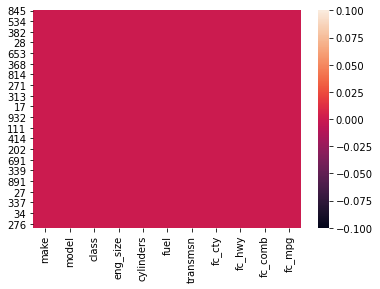

In [49]:
# Checking Nulls
sns.heatmap(Xtrain.isna())

In [51]:
# Dtype check - right
Xtrain.apply(lambda x: x.dtype)

make          object
model         object
class         object
eng_size     float64
cylinders      int64
fuel          object
transmsn      object
fc_cty       float64
fc_hwy       float64
fc_comb      float64
fc_mpg         int64
dtype: object

In [15]:
Xtrain

,make,model,class,eng_size,cylinders,fuel,transmsn,fc_cty,fc_hwy,fc_comb,fc_mpg
845,NISSAN,JUKE,STATION WAGON - SMALL,1.6,4,AV,Z,8.7,7.3,8.1,35
547,JAGUAR,F-TYPE CONVERTIBLE,TWO-SEATER,3.0,6,AS8,Z,11.8,8.4,10.3,27
717,MAZDA,MAZDA6 (i-ELOOP),MID-SIZE,2.5,4,AS6,X,8.4,5.9,7.3,39
239,CHEVROLET,SILVERADO,PICKUP TRUCK - STANDARD,5.3,8,A6,X,14.6,10.3,12.7,22
365,FORD,EXPLORER FFV,SUV - STANDARD,3.5,6,AS6,X,13.7,9.7,11.9,24
...,...,...,...,...,...,...,...,...,...,...,...
330,DODGE,JOURNEY FFV,SUV - SMALL,3.6,6,A6,X,14.2,9.4,12.0,24
466,GMC,TERRAIN AWD,SUV - SMALL,2.4,4,A6,X,11.5,8.2,10.0,28
121,BMW,M6,COMPACT,4.4,8,M6,Z,16.2,10.9,13.8,20
1044,VOLKSWAGEN,PASSAT,MID-SIZE,1.8,4,M5,X,10.0,6.9,8.6,33


##### 

Making a function to get the pie chart

In [98]:
def make_pie(feature, label, cut=True):
    # Making a color palette to color our pie
    from matplotlib import cm
    color = cm.inferno(np.linspace(.4, .8, 11))

    if cut:
        # Making a proportion of top 10 and clubbing others in "Others"
        aa = Xtrain[feature].value_counts(normalize=True) * 100
        class_types = pd.concat([aa[:10], pd.Series(aa[10:].sum(), index=["Others"])])
    else:
        class_types = Xtrain[feature].value_counts()
        
    # Making PIE
    plt.pie(class_types, labels=class_types.index,
               textprops={"color":"white"}, autopct="%.2f%%",
               colors=color)
    plt.title(label, fontdict={"color":"white"})

#### Our DataSet has... 

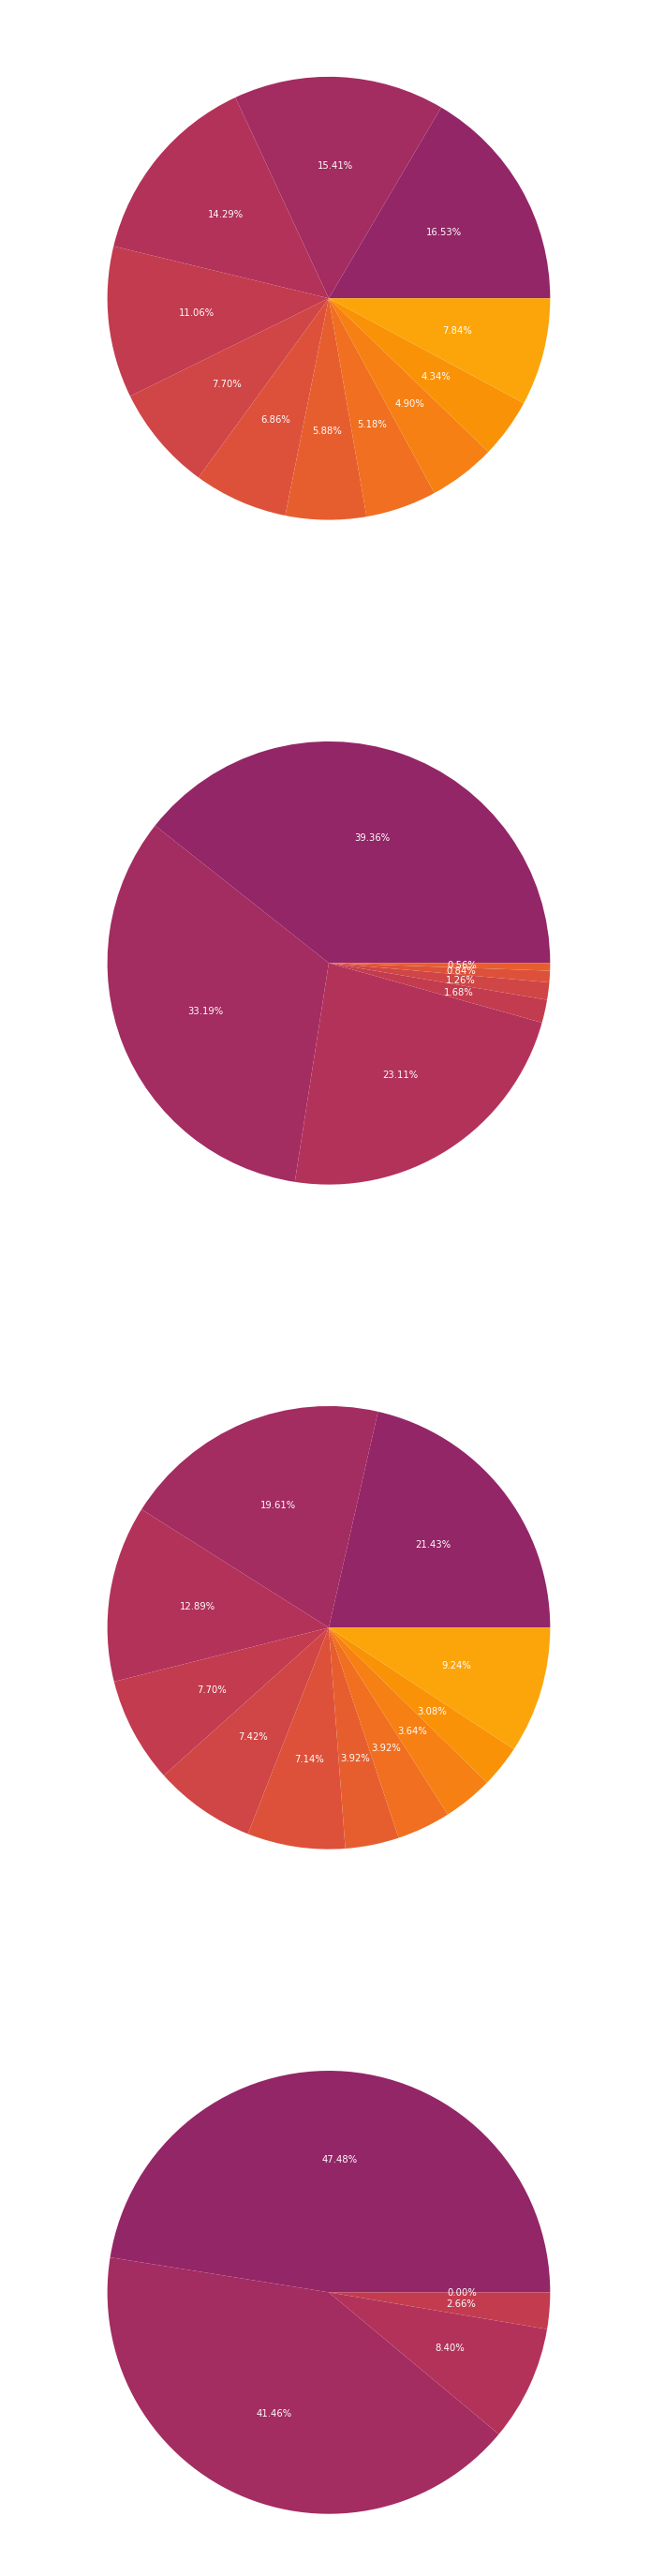

In [106]:
plt.figure(figsize=(35, 50))

plt.subplot(4, 1, 1)
make_pie("class", label="Class")

plt.subplot(4, 1, 2)
make_pie("cylinders", label="Cylinders", cut=False)

plt.subplot(4, 1, 3)
make_pie("fuel", label="Fuels")

plt.subplot(4, 1, 4)
make_pie("transmsn", label="Transmission")

**Interpretation**:
1. Around 45% of car class are `"MID-SIZE, COMPACT, SUV"`
2. Mostly Cars have `4, 6 or 8` cylinders
3. A6 type of fuel is used the most for `21%` of time and AS6 for `19%`.
4. X and Z transmission covers around `90%` of all cars.

# 

#### Making a funtion to compare FC by the parameters. 

In [214]:
def get_fc_by(feature):
    """
    This function will plot the STACKED barplot
    according to the feature passed in as a parameter.
    """
    
    
    grouped = Xtrain.groupby(feature)[["fc_cty", "fc_hwy", "fc_comb", "fc_mpg"]].mean()
    fuel_counts = Xtrain[feature].value_counts()

    # To sort them by their count
    grouped = grouped.reindex(fuel_counts.index)
    grouped.plot(kind="bar", stacked=True, figsize=(10, 5))

    # Printing their counts
    for i, (count, sum_) in enumerate(zip(fuel_counts, grouped.sum(1).round(1))):
        plt.text(i, sum_, str(count))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
               title="Fuel Consumed In\n—————————")
    
    plt.xlabel(f"{feature.title()} Type")
    plt.ylabel("Mean Fuel Consumption")
    plt.title("Fuel Consumption by their types and in 4 areas");

##### 

#### Fuel Consumption with respect to... 

#### 1. Fuel Type 

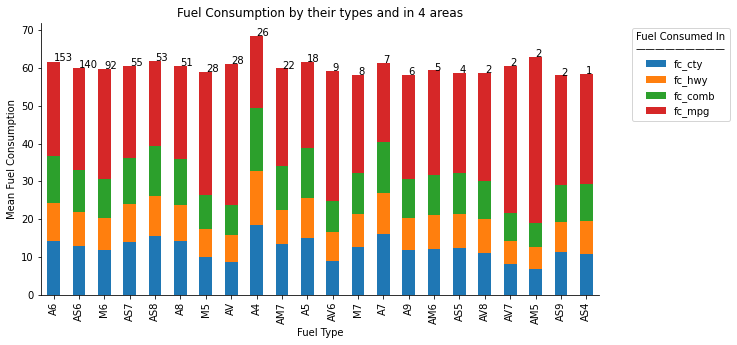

In [210]:
get_fc_by("fuel")

**Interpretation**:
It does show something about the fuel consumption.
1. A4 fuel consumes fuel evenly of all kinds. (Has 3.6% participation).
2. A4 has the relatively higher fuel consumption than other fuel types.

##### 

#### 2. Engine Size

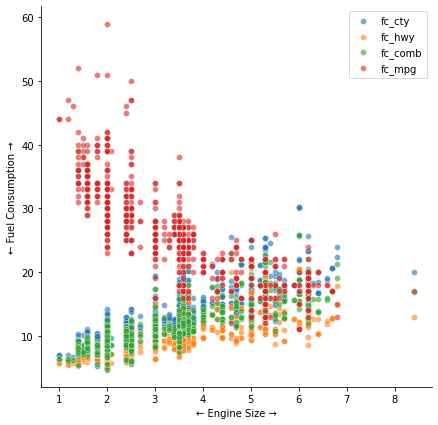

In [198]:
plt.figure(figsize=(7, 7))
for fc in ["fc_cty", "fc_hwy", "fc_comb", "fc_mpg"]:
    sns.scatterplot(x="eng_size", y=fc, data=Xtrain, alpha=0.6, label=fc)
plt.xlabel("← Engine Size →")
plt.ylabel("← Fuel Consumption →");

**Interpretation**:
1. MPG Has a negative relation with Engine Size so that means Fuel Consumption becomes less as the size of Engine Increases. Bigger engine is better!

##### 

#### 3. Transmission

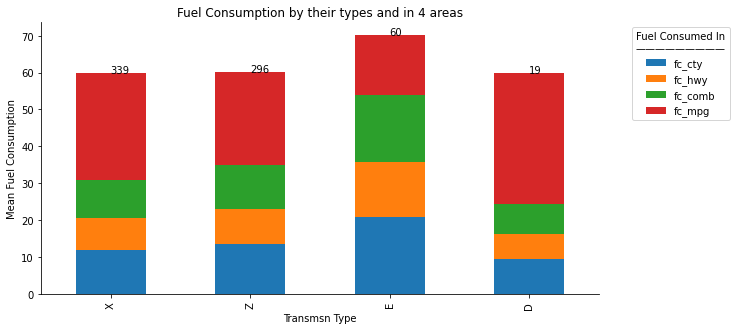

In [211]:
get_fc_by("transmsn")

Not something "*trendful*" here.

#### 

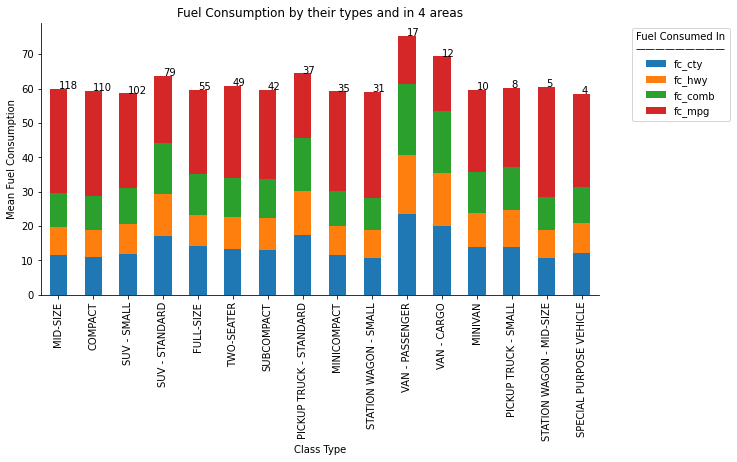

In [213]:
get_fc_by("class")

**Interpretation**:
1. VAN-PASSENGER type of vehicle has shown the cunsumption more than others. But to note that, it also has LOWER amount of FC in MPG while others have more.
2. SUV-SMALL has shown the even usage of FC.

#### 

#### Which type of car belong to which?

In [375]:
aa = Xtrain.groupby(["make","class"]).size()
aa = aa.unstack().T

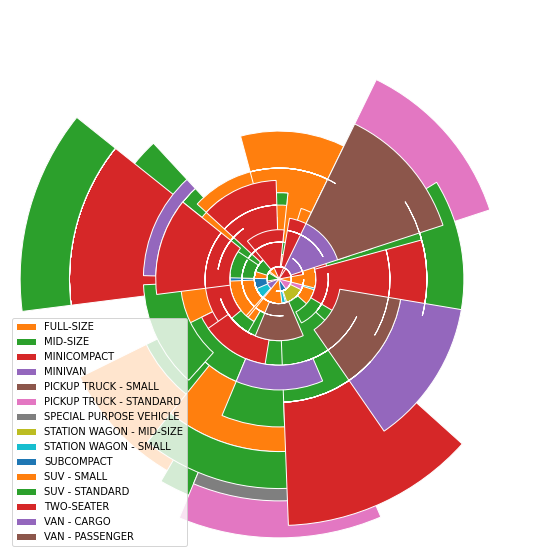

In [458]:
filler = aa.fillna(method="ffill").fillna(0)
plt.figure(figsize=(10, 10))

x_max = 2 * np.pi
x = np.linspace(0, x_max, len(aa.columns), endpoint=False)
x = np.arange(len(aa.columns))
width=0.8
inner_radius = 1

ax = plt.subplot(111, polar=True)
ax.bar(x, aa.iloc[0].fillna(0))
for idx in range(1, len(aa.index)):
    plt.bar(x, aa.iloc[idx].fillna(0), bottom=filler.iloc[idx - 1], 
            label=aa.index[idx], width=width, linewidth=1, edgecolor="white")
    plt.xticks(rotation=90)
plt.axis("off")
plt.legend();

My failed attempt to plot Nightangle Plot. But it still shows this ↓

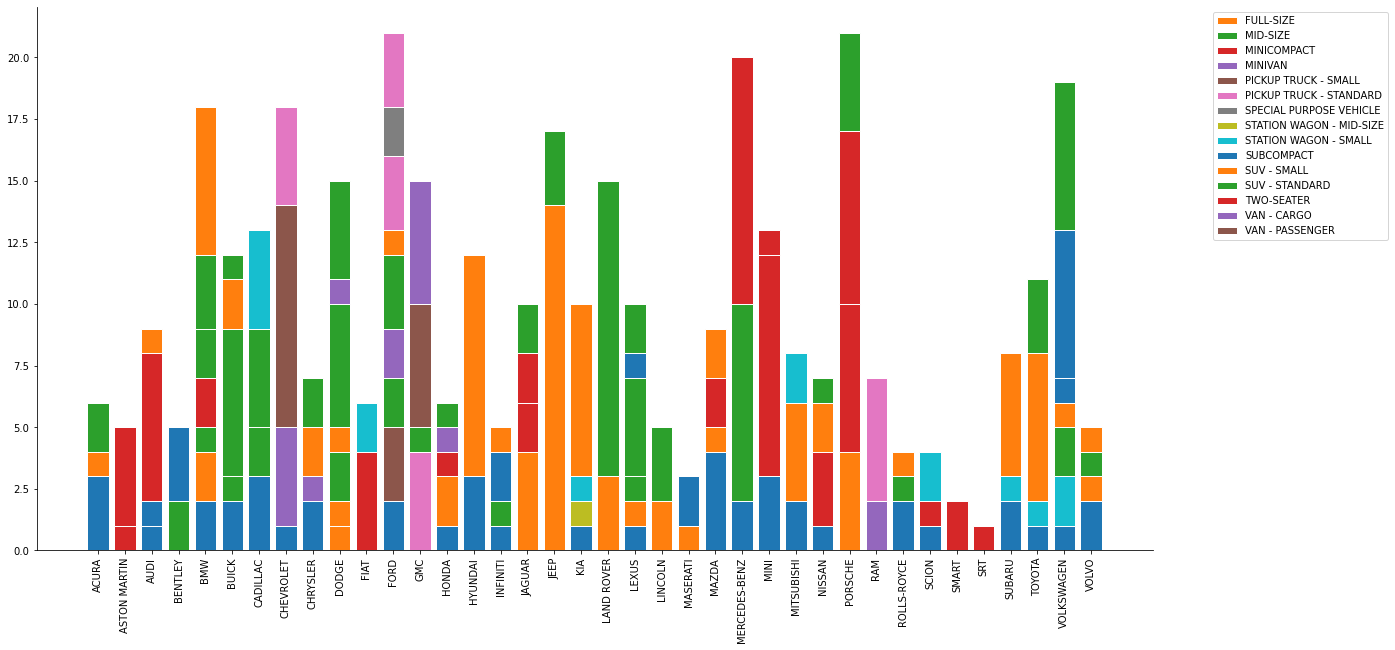

In [473]:
filler = aa.fillna(method="ffill").fillna(0)
plt.figure(figsize=(20, 10))

plt.bar(x, aa.iloc[0], linewidth=1, edgecolor="white")
for idx in range(1, len(aa.index)):
    plt.bar(aa.columns, aa.iloc[idx], bottom=filler.iloc[idx - 1], 
            label=aa.index[idx], linewidth=1, edgecolor="white")
    plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

**Interpretation**:
1. We can see that which company makes which kind of cars. Sorry, here you have to interpret yourself.

# 

# 3. Finding Appropriate Features *and* 4. Feature Engineering


In [17]:
combined_xy = pd.concat([Xtrain, ytrain], axis=1)

In [24]:
combined_xy.corr()["co2"]

eng_size     0.873777
cylinders    0.845838
fc_cty       0.898730
fc_hwy       0.863749
fc_comb      0.892867
fc_mpg      -0.906544
co2          1.000000
Name: co2, dtype: float64

Looks like all features are so strongly linearly correlated with CO2 emission!

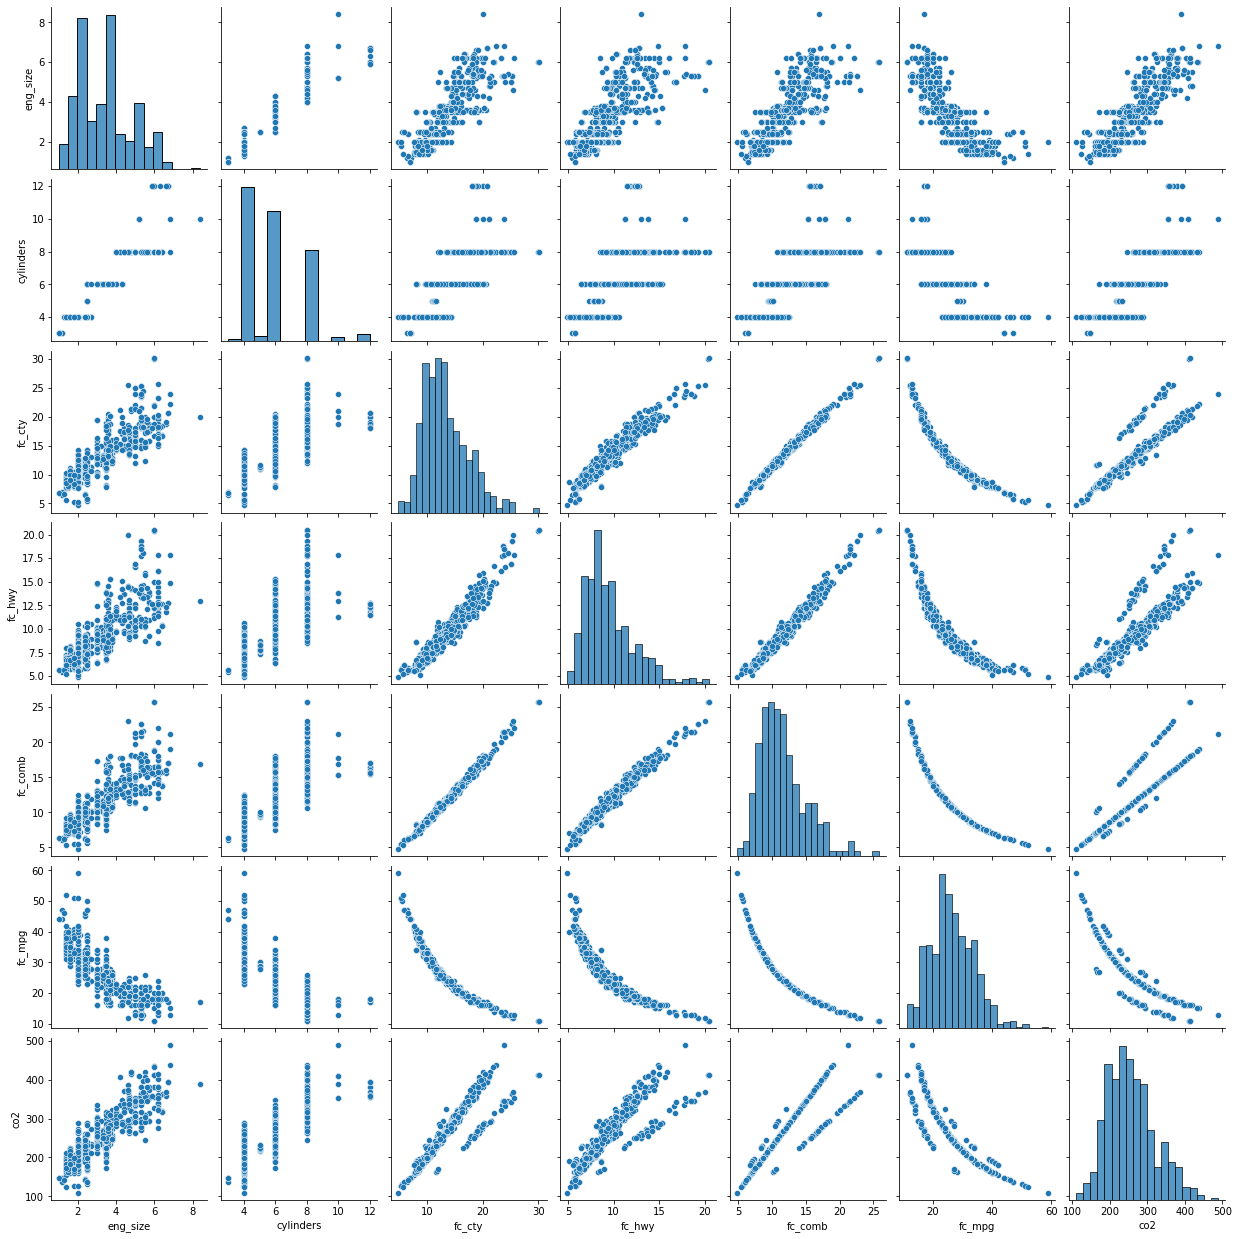

In [17]:
sns.pairplot(combined_xy)

The data is inter-correlated too. Which is called "Multicolinearity" problem. In Linear Regression, we must avoid that. But we will check with and without performance.

#### Let's try to see the impact of Categorical Features on CO2. 

Making a reusable function

In [93]:
def get_categorical_relation(feature):
    grouped = combined_xy[cat_features + ["co2"]].groupby(feature).co2.agg({'mean', 'count'})
    grouped = grouped.sort_values(by="mean")

    plt.figure(figsize=(20, 10))
    plt.barh(grouped.index, grouped["mean"])
    for idx in range(grouped.shape[0]):
        mean = grouped.iloc[idx]["mean"]
        count = grouped.iloc[idx]["count"].astype(int)
        plt.text(mean, idx, str(count))
    plt.xlabel("← CO2 →")
    plt.title(feature.title());

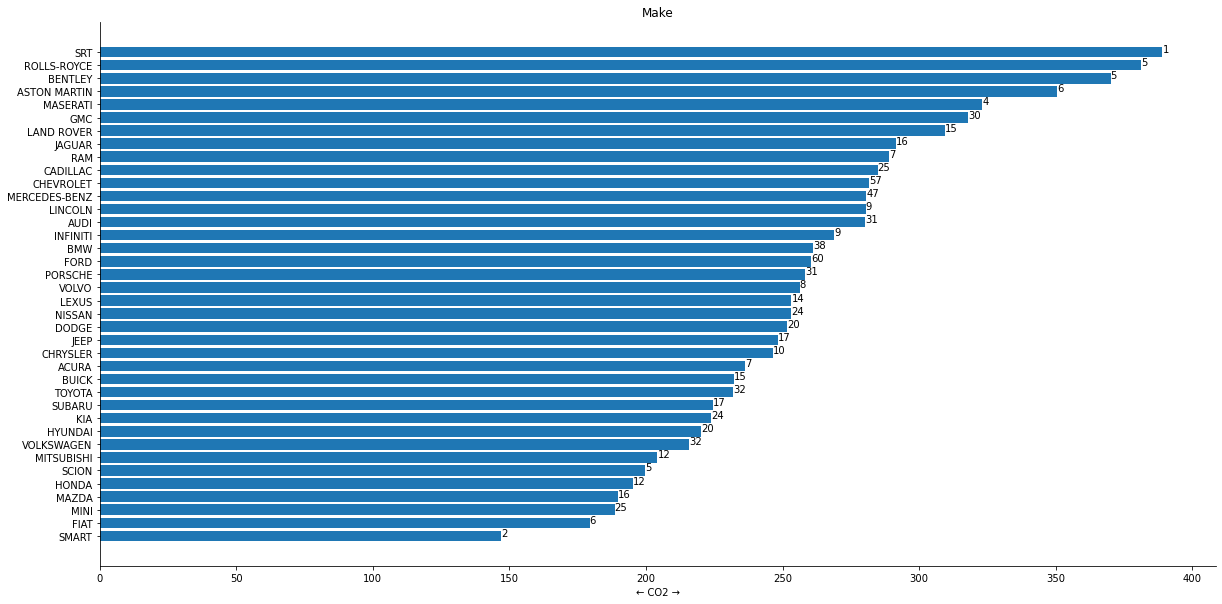

In [94]:
get_categorical_relation("make")

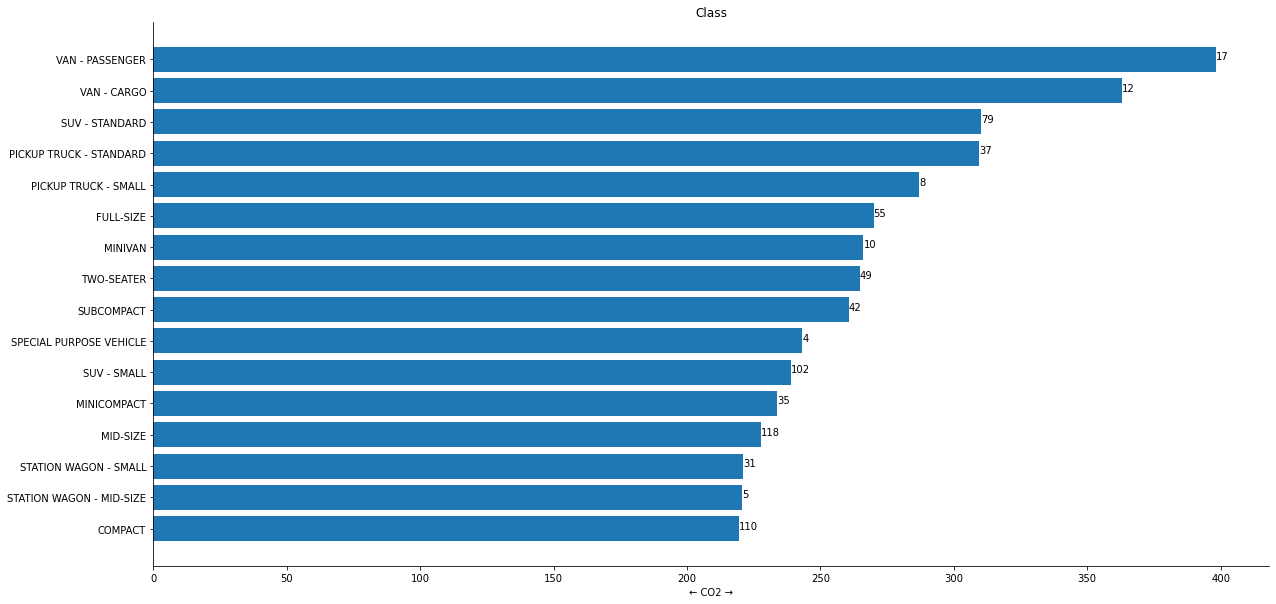

In [95]:
get_categorical_relation("class")

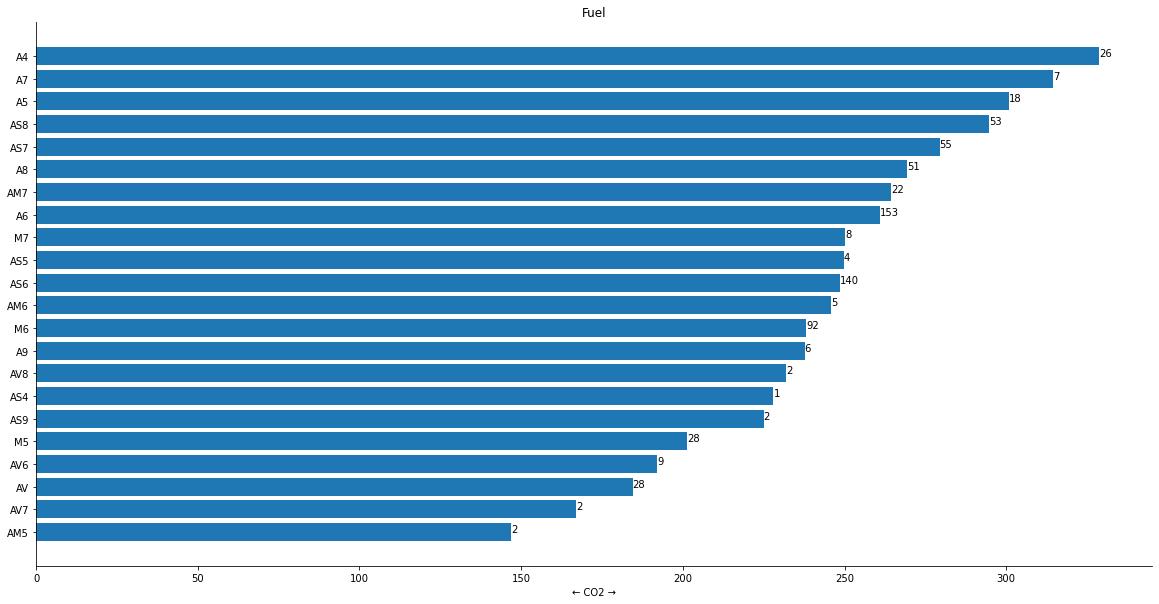

In [96]:
get_categorical_relation("fuel")

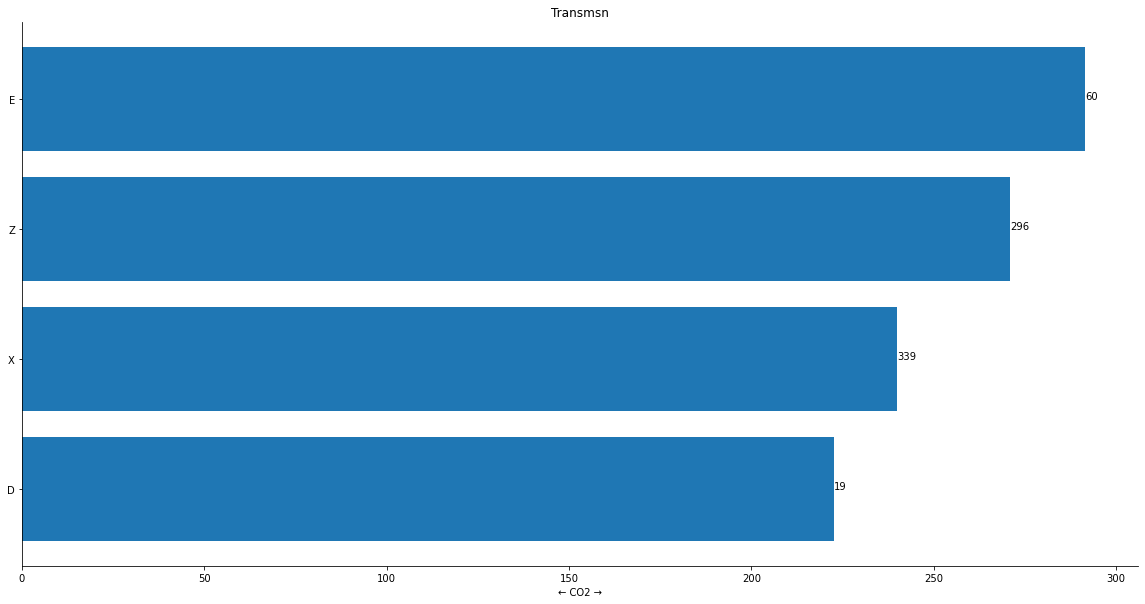

In [97]:
get_categorical_relation("transmsn")

**Summary of All plots**:
1. `GMT` has shown the most CO2 emission (After filtering out less counted cars) around 325 units.
2. `MINI` has shown the least Co2 emission (After filtering out less counted cars) ariund 190 units.
3. `VAN` and `SUVs` are emitting the most of co2 of 400 units and 360 units respectively.
4. While `COMPACT` cars have shown the least of 220 units. (After filtering the lower counted cars)
5. `A4` and `AS8` fuels have contributed the most in CO2 emission while `AV` type of fuel has shown the least.

# 

# 5. Data Preparation for Model *and* 6. Pipeline 

##### First we will try the model `Without Scaling` and then we will do `With Scaling`

###### 

→ Conversion of Categorical to Numerical (ie. Encoding) ***and*** Nothing in numerical, so we will just pass those numerical columns as is. 
    
    Here every feature is nominal, we we will use OneHotEncoding.

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

###### 

`WITHOUT SCALING`

In [21]:
transformer = ColumnTransformer([
                ('categorical_conversion', OneHotEncoder(handle_unknown='ignore'), cat_features),
                ('as_it_is', 'passthrough', num_features),
            ])

In [34]:
Xtrain_trans = transformer.fit_transform(Xtrain)

In [35]:
Xtest_trans = transformer.transform(Xtest)

## 

# 7. Model Training

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()
model.fit(Xtrain_trans, ytrain)

LinearRegression()

# 8. Evaluation 

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

On Training Data

In [39]:
r2_score(ytrain, model.predict(Xtrain_trans))

0.9990220631007523

On Test Data

In [40]:
mean_squared_error(ytest, model.predict(Xtest_trans))

94.3386661338395

In [41]:
r2_score(ytest, model.predict(Xtest_trans))

0.9768338965942219

# 

`WITH SCALING`

In [43]:
transformer = ColumnTransformer([
                ('categorical_conversion', OneHotEncoder(handle_unknown='ignore'), cat_features),
                ('scale', StandardScaler(), num_features),
            ])

In [44]:
Xtrain_trans = transformer.fit_transform(Xtrain)

In [45]:
Xtest_trans = transformer.transform(Xtest)

## 

# 7. Model Training

In [36]:
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression()
model.fit(Xtrain_trans, ytrain)

LinearRegression()

# 8. Evaluation 

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

On Training Data

In [48]:
r2_score(ytrain, model.predict(Xtrain_trans))

0.999022063100992

On Test Data

In [49]:
mean_squared_error(ytest, model.predict(Xtest_trans))

94.33882358693175

In [51]:
r2_score(ytest, model.predict(Xtest_trans))

0.976833857929539

# `97%`

Prettymuch same! Now, let's drop a couple of correlated features.

###### 

<AxesSubplot:>

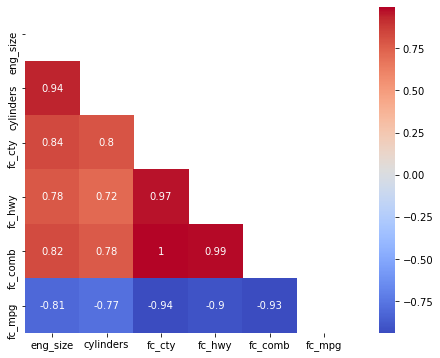

In [53]:
plt.figure(figsize=(10, 6))
corr = Xtrain[num_features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, square=True, cmap="coolwarm", annot=True)

As said, there are many features which are internally correlated. So, we can remove them.

Takable:
1. Cylinders - FC_hwy
2. Eng-size - FC_hwy

Now, we need to select which one is most related with CO2

<AxesSubplot:>

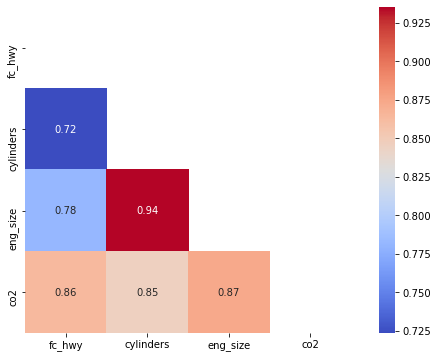

In [54]:
plt.figure(figsize=(10, 6))
corr = combined_xy[["fc_hwy", "cylinders", "eng_size", "co2"]].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, square=True, cmap="coolwarm", annot=True)

We can't take cylinders and eng_size together agian... so finally after looking at the corr, I decided to go with only 2 features `eng_size` and `fc_hwy`.

#### 

`WITH SCALING` and `REMOVED FEATURES`

In [73]:
acceptable_nums = ["eng_size", "fc_hwy"]

In [96]:
transformer = ColumnTransformer([
                ('categorical_conversion', OneHotEncoder(handle_unknown='ignore'), cat_features),
                ('scale', StandardScaler(), acceptable_nums)
            ])

In [97]:
Xtrain_trans = transformer.fit_transform(Xtrain)
Xtest_trans = transformer.transform(Xtest)

## 

# 7. Model Training

In [90]:
from sklearn.linear_model import LinearRegression

In [99]:
model = LinearRegression()
model.fit(Xtrain_trans, ytrain)

LinearRegression()

# 8. Evaluation 

In [92]:
from sklearn.metrics import mean_squared_error, r2_score

On Training Data

In [100]:
r2_score(ytrain, model.predict(Xtrain_trans))

0.9955351269395177

On Test Data

In [101]:
mean_squared_error(ytest, model.predict(Xtest_trans))

196.03512298987823

In [102]:
r2_score(ytest, model.predict(Xtest_trans))

0.9518609906577963

Not at all!!

# 

So, removal of a couple features resulted in lower accuracy. So we might avoid that idea.

___

### Trying to make - build up new features which can correlate more with Co2

*With which we will build our custom pipeline*

In [124]:
def new_ft(operation):
    ft = {}
    for i in range(len(num_features)):
        for j in range(i+1, len(num_features)):
            ft1 = num_features[i]
            ft2 = num_features[j]
            oparated = eval(f"combined_xy[ft1] {operation} combined_xy[ft2]")
            corr = oparated.corr(combined_xy["co2"])
            ft[f"{ft1} {operation} {ft2}"] = corr
    ser = pd.Series(ft)
    return pd.concat([ser.rename("ORI"), ser.apply(abs).rename("ABS")], axis=1).sort_values(by="ABS", ascending=False)

In [117]:
combined_xy[num_features].head(2)

,eng_size,cylinders,fc_cty,fc_hwy,fc_comb,fc_mpg
845,1.6,4,8.7,7.3,8.1,35
547,3.0,6,11.8,8.4,10.3,27


In [130]:
new_ft("-")

,ORI,ABS
cylinders - fc_mpg,0.928624,0.928624
eng_size - fc_mpg,0.925184,0.925184
fc_cty - fc_mpg,0.917022,0.917022
fc_comb - fc_mpg,0.915996,0.915996
fc_hwy - fc_mpg,0.913053,0.913053
fc_cty - fc_hwy,0.811893,0.811893
fc_hwy - fc_comb,-0.811835,0.811835
fc_cty - fc_comb,0.810744,0.810744
eng_size - fc_cty,-0.810697,0.810697
eng_size - fc_comb,-0.762712,0.762712


cylinders - fc_mpg	gives 0.928624 from others. So, you know, we can use this as a new feature.

In [239]:
Xtrain["cylinders - fc_mpg"] = Xtrain["cylinders"] - Xtrain["fc_mpg"]
Xtest["cylinders - fc_mpg"] = Xtest["cylinders"] - Xtest["fc_mpg"]

In [260]:
num_features = ['fc_comb', 'cylinders - fc_mpg']

In [261]:
transformer = ColumnTransformer([
                ('categorical_conversion', OneHotEncoder(handle_unknown='ignore'), cat_features),
                ('scale', StandardScaler(), num_features),
            ])

In [262]:
Xtrain_trans = transformer.fit_transform(Xtrain)

In [263]:
Xtest_trans = transformer.transform(Xtest)

## 

# 7. Model Training

In [264]:
from sklearn.linear_model import LinearRegression

In [265]:
model = LinearRegression()
model.fit(Xtrain_trans, ytrain)

LinearRegression()

# 8. Evaluation 

In [266]:
from sklearn.metrics import mean_squared_error, r2_score

On Training Data

In [267]:
r2_score(ytrain, model.predict(Xtrain_trans))

0.9988848480250611

On Test Data

In [268]:
mean_squared_error(ytest, model.predict(Xtest_trans))

75.18696843886936

In [269]:
r2_score(ytest, model.predict(Xtest_trans))

0.9815368484948609

# `98%`

Improved!

# 

Now, we can make a custom pipeline which can add our new feature.

## Custom Pipeline 

In [270]:
from sklearn.base import BaseEstimator, TransformerMixin

In [372]:
class Add_Feature(BaseEstimator, TransformerMixin):
    """
    This function will act like a transformer which can be added as a
    part of the pipeline. It will add new feature from the data
    `cylinders - fc_mpg` which has been found the most useful from EDA.
    """
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Add new feature
        new_feature = X.iloc[:, 1] - X.iloc[:, 2]
        return pd.concat([X.iloc[:, 0], new_feature], axis=1)

In [373]:
transformer = ColumnTransformer([
                ('categorical_conversion', OneHotEncoder(handle_unknown='ignore'), cat_features),
                ('custom', Add_Feature(), ["fc_comb", "cylinders", "fc_mpg"])
            ])

In [376]:
tr = transformer.fit_transform(Xtrain)
te = transformer.transform(Xtest)

In [378]:
model = LinearRegression()
model.fit(tr, ytrain)

LinearRegression()

# 8. Evaluation 

In [266]:
from sklearn.metrics import mean_squared_error, r2_score

On Training Data

In [379]:
r2_score(ytrain, model.predict(tr))

0.9988848480248095

On Test Data

In [380]:
mean_squared_error(ytest, model.predict(te))

75.18709434046592

In [269]:
r2_score(ytest, model.predict(tr))

0.9815368484948609

In [382]:
r2_score(ytest, model.predict(te))

0.9815368175780637

# `98%`

# 

Cool!